<a href="https://colab.research.google.com/github/CaioFArantes/Python_Projects_for_Data_Analysis/blob/main/Brazilian_Sociodemographics_applying_Statistics_and_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESCRIPTION

This is a DataBase from the ferederal institution IBGE (In Portuguese: Instituto Brasileiro de Geografia e Estatística | In English: Brazilian Institute of Geography and Statistics) where it is possible to analyze Brazilan sociodemographics data by some variables (Sex, Ethinic Group, Income, Age and Height)

The research name is PNAD (Pesquisa Nacional por Amostra de Domicílios) is the National Household Sample Survey conducted by IBGE, which collects data from a representative sample of households in Brazil.

# Uploading and understanding the DB

In [67]:
from google.colab import files
uploaded = files.upload()

Saving dados_en.csv to dados_en.csv


In [94]:
import pandas as pd
data = pd.read_csv('dados_en.csv', sep = ';')

data.head(10)

,Region Code,Sex,Age,Ethnic Code,Years of Study,Income,Height
0,11,0,23,8,12,800,1.603
1,11,1,23,2,12,1150,1.739
2,11,1,35,8,15,880,1.760
3,11,0,46,2,6,3500,1.783
4,11,1,47,8,9,150,1.690
5,11,1,34,8,12,790,1.637
6,11,0,57,8,12,3150,1.570
7,11,1,60,8,12,1700,1.608
8,11,1,50,4,14,1800,1.780
9,11,0,26,8,12,1150,1.793


# Def ordinal qualitatives

In [96]:
data['Years of Study']

0        12
1        12
2        15
3         6
4         9
         ..
76835    11
76836     7
76837    12
76838     4
76839     4
Name: Years of Study, Length: 76840, dtype: int64

In [97]:
data['Years of Study'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13])

In [98]:
sorted(data['Years of Study'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Def nominal qualitatives

In [100]:
sorted(data['Sex'].unique())

[0, 1]

In [101]:
sorted(data['Ethnic Code'].unique())

[0, 2, 4, 6, 8]

# Def discrete quantitatives

In [103]:
data.Age.min()

13

In [104]:
data.Age.max()

99

In [105]:
print('We have in our DB an age range that comes from %s to %s years old' % (data.Age.min(), data.Age.max()))

We have in our DB an age range that comes from 13 to 99 years old


In [106]:
print('We have in our DB an Height range that comes from %s to %s meters' % (data.Height.min(), data.Height.max()))

We have in our DB an Height range that comes from 1.339 to 2.028 meters


# Frequency distribution per Sex

In [108]:
data.Sex.value_counts()

0    53250
1    23590
Name: Sex, dtype: int64

In [109]:
data.Sex.value_counts(normalize=True) *100

0    69.299844
1    30.700156
Name: Sex, dtype: float64

In [110]:
frequency = data['Sex'].value_counts()

In [111]:
percentage = data['Sex'].value_counts(normalize = True)*100

In [118]:
frequency_percentage_sex = pd.DataFrame ({'Frequency' : frequency, 'Percentage %' : percentage})
frequency_percentage_sex.rename(index = {0: 'Masculine',1:'Feminine'}, inplace=True)
frequency_percentage_sex.rename_axis('Sex', axis = 'columns', inplace=True)

frequency_percentage_sex

Sex,Frequency,Percentage %
Masculine,53250,69.299844
Feminine,23590,30.700156


# Using crosstab to relate Sex and Ethinic

In [120]:
sex = {0:'Masculine', 1:'Feminine'}

ethinic = {0:'Indigenous', 2:'Caucasian', 4:'African',6:'Asian',8:'Pardo/Mixed',9:'No declaration'}

In [122]:
frequency_2 = pd.crosstab(data['Sex'],data['Ethnic Code'])
frequency_2

Ethnic Code,0,2,4,6,8
Sex,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [123]:
frequency_2.rename(index = sex,inplace=True)
frequency_2.rename(columns = ethinic,inplace=True)

frequency_2

Ethnic Code,Indigenous,Caucasian,African,Asian,Pardo/Mixed
Sex,,,,,
Masculine,256,22194,5502,235,25063
Feminine,101,9621,2889,117,10862


In [124]:
percentage_2 = pd.crosstab(data['Sex'],data['Ethnic Code'],normalize=True)*100
percentage_2.rename(index = sex,inplace=True)
percentage_2.rename(columns = ethinic,inplace=True)

percentage_2

Ethnic Code,Indigenous,Caucasian,African,Asian,Pardo/Mixed
Sex,,,,,
Masculine,0.333160,28.883394,7.160333,0.305830,32.617126
Feminine,0.131442,12.520822,3.759761,0.152264,14.135867


# Relating Sex, Ethinic Group and mean Income

In [130]:
income_frequency = pd.crosstab(data['Sex'], data['Ethnic Code'], aggfunc ='mean', values = data['Income'])
income_frequency.rename(index = sex, inplace=True)
income_frequency.rename(columns = ethinic,inplace=True)

income_frequency ## in BRL

Ethnic Code,Indigenous,Caucasian,African,Asian,Pardo/Mixed
Sex,,,,,
Masculine,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminine,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


# Classifying Income Groups based on Brazilian Social Rank. The ranges are based on studies from IBGE (Brazilian Institute of Geography and Statistics)

In [135]:
data.Income.min()

0

In [136]:
data.Income.max()

200000

In [137]:
income_range = [0,1576,3152,7880,15760,20000]
labels = ['E','D','C','B','A']

In [138]:
frequency_3 = pd.value_counts (
    (pd.cut (x=data.Income,
             bins = income_range,
             labels = labels,
             include_lowest = True))
)

frequency_3

E    49755
D    16700
C     7599
B     2178
A      349
Name: Income, dtype: int64

In [139]:
percentage_3 = pd.value_counts (
    (pd.cut (x=data.Income,
             bins = income_range,
             labels = labels,
             include_lowest = True)),
     normalize = True *100
)

percentage_3

E    0.649704
D    0.218070
C    0.099228
B    0.028440
A    0.004557
Name: Income, dtype: float64

In [140]:
df_frequency_percentage = pd.DataFrame({'Frequency': frequency_3, 'Percentage %': percentage_3})

df_frequency_percentage

,Frequency,Percentage %
E,49755,0.649704
D,16700,0.218070
C,7599,0.099228
B,2178,0.028440
A,349,0.004557


In [142]:
df_frequency_percentage.sort_index(ascending=False)

,Frequency,Percentage %
A,349,0.004557
B,2178,0.028440
C,7599,0.099228
D,16700,0.218070
E,49755,0.649704


By analyzing the differences between the social ranks we can see how Brazil is social unequal on its income distribution.

# GRAPHS VISUALIZATION

<Axes: >

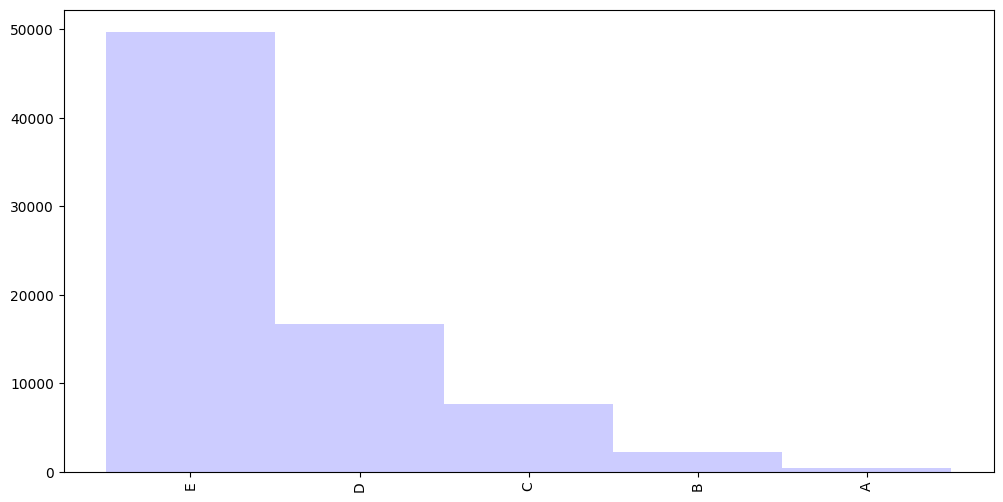

In [145]:
df_frequency_percentage['Frequency'].plot.bar(width=1, color = 'blue', alpha = 0.2, figsize=(12,6))

In [146]:
import seaborn as sns

<ipython-input-148-ee76b51f9786>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.Age)


<Axes: title={'center': 'Frequency Distribution - Age'}, xlabel='Age', ylabel='Density'>

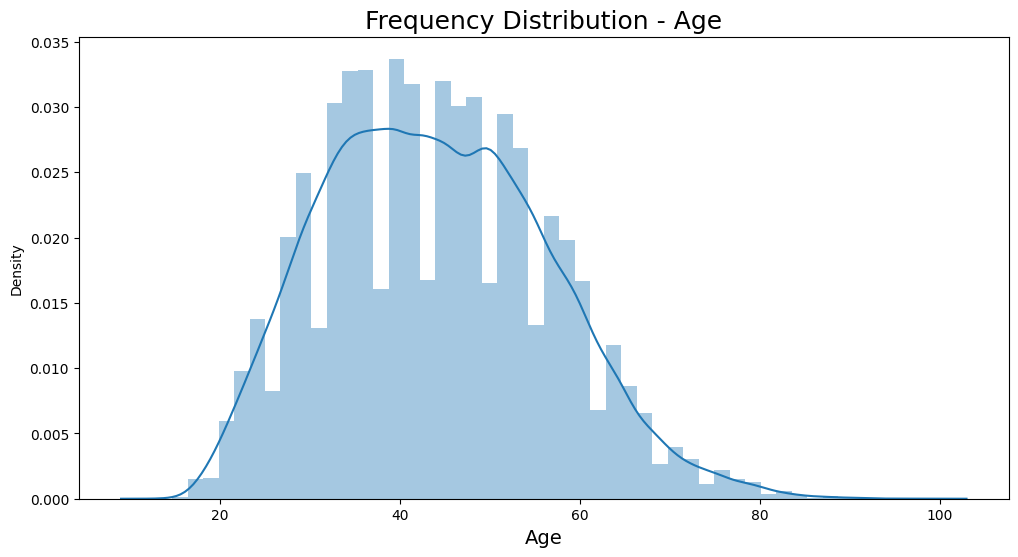

In [148]:
ax = sns.distplot(data.Age)

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Age', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax

<ipython-input-149-1fb5ca4c8463>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.Height)


<Axes: title={'center': 'Frequency Distribution - Height'}, xlabel='Height', ylabel='Density'>

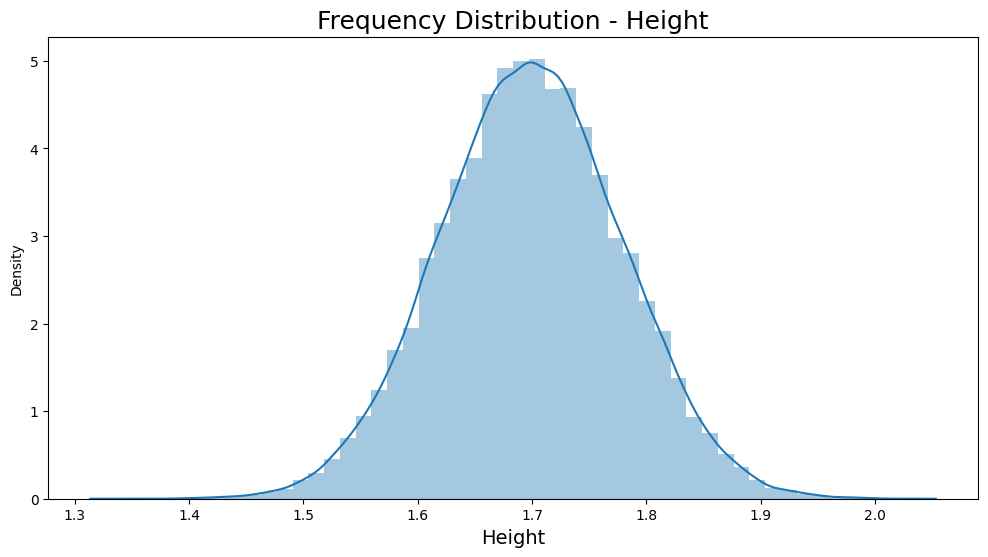

In [149]:
ax = sns.distplot(data.Height)

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Height', fontsize=18)
ax.set_xlabel('Height', fontsize=14)
ax

In [161]:
data.Height.mean()

1.6990127147319107

The mean value of a Brazilian is 1.69 meters

<ipython-input-151-709ebfcba3a6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.query('Income < 20000').Income)


<Axes: title={'center': 'Frequency Distribution - Income (without outliers)'}, xlabel='Income', ylabel='Density'>

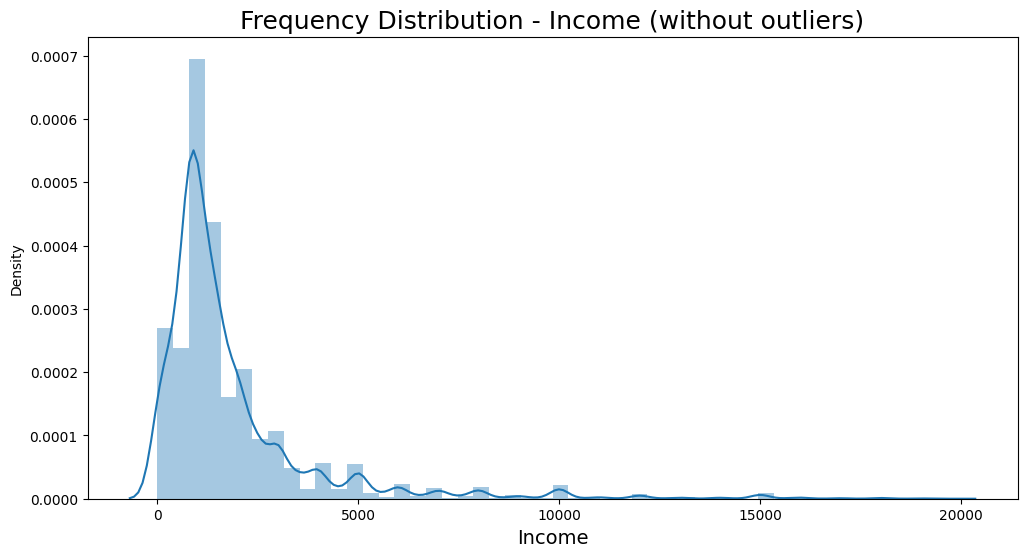

In [151]:
ax = sns.distplot(data.query('Income < 20000').Income)

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - Income (without outliers)', fontsize=18)
ax.set_xlabel('Income', fontsize=14)
ax

In [160]:
data.Income.mean()

2000.3831988547631

Here we can see the Brazilian income distribution. Mean value is 2.000 BRL

<Axes: title={'center': 'Income'}, xlabel='BRL', ylabel='Sex'>

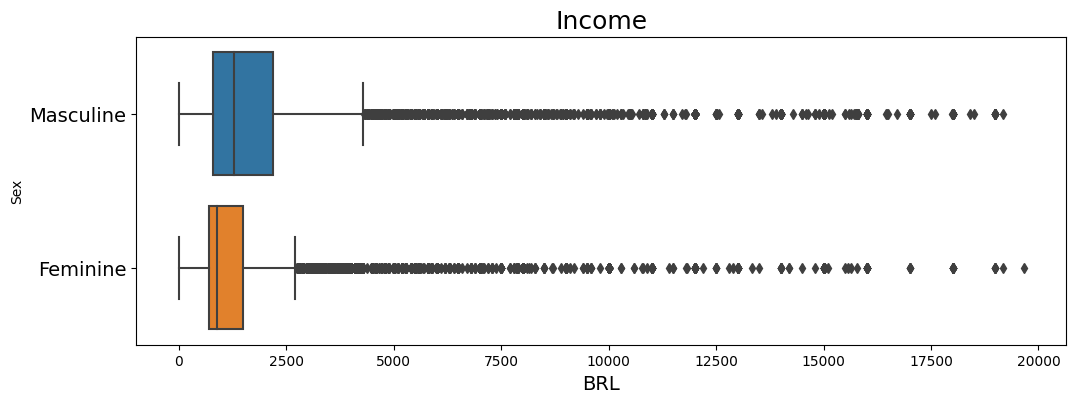

In [159]:
ax = sns.boxplot( x = 'Income', y = 'Sex', data = data.query('Income < 20000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Income', fontsize=18)
ax.set_xlabel('BRL', fontsize=14)
ax.set_yticklabels(['Masculine','Feminine'], fontsize=14)

ax

Here we can see the difference of Income between Sex in Brazil.
Women unfortunately still doesn't have a equal income.